11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.8683 - loss: 0.4307 - val_accuracy: 0.9844 - val_loss: 0.0524
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9820 - loss: 0.0564 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9914 - val_loss: 0.0284
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9920 - loss: 0.0264 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9901 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9868 - loss: 0.0421
Test accuracy: 0.9901


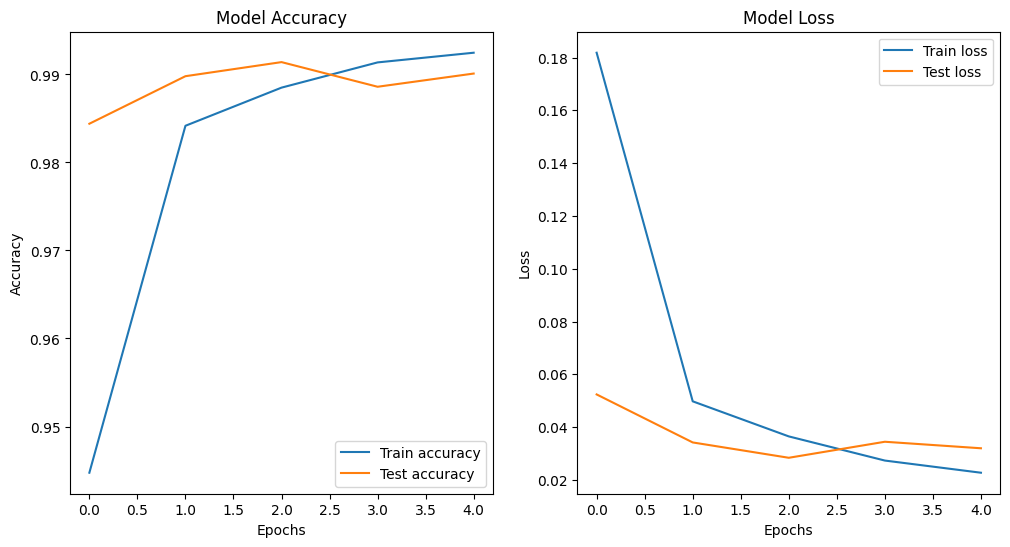

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


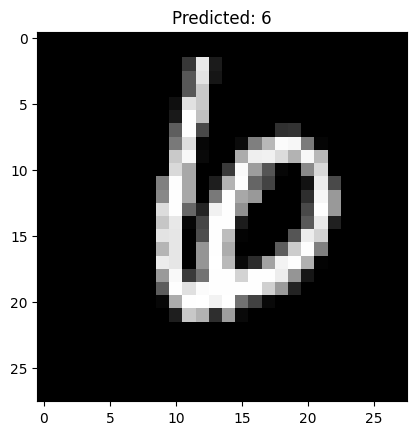

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))


model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test)


print(f"Test accuracy: {test_acc:.4f}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

import numpy as np

index = np.random.randint(0, len(x_test))
image = x_test[index]


image = image.reshape(1, 28, 28, 1)

prediction = model.predict(image)


predicted_digit = np.argmax(prediction)


plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()